In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# 중산층 소비지출의 데이터를 가져온다.
# Status를 예측하는 SVM모델을 만들어 보자. 
# 해당 데이터는 정규화를 통해 연속값으로 변환해 줄 것이기 때문에 Logistic Regression, SVR 모델을 이용할 수 있다.
middle = pd.read_csv('middle.csv')
middle.head() 

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [4]:
#데이터를 정규화한다. 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(middle)

middle_regu = scaler.transform(middle)
middle_regu.shape , type(middle_regu)
middle_regu = pd.DataFrame(middle_regu)
middle_regu.columns = ['food','book','cul','cloth','travel','status']
middle_regu

,food,book,cul,cloth,travel,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914
...,...,...,...,...,...,...
95,-1.578440,-0.166059,0.828053,-0.831106,0.817433,0.670280
96,0.589127,1.025649,-1.540227,0.791461,0.679229,0.670280
97,0.149533,0.282381,-0.899934,-1.467939,-0.411665,0.670280
98,0.440784,-0.385771,-2.105312,0.634279,0.550286,-1.491914


In [6]:
#훈련데이터를 만든다. y는 target데이터이다. 

X = middle_regu.iloc[:, [0,1,2,3,4]].values  
y = middle_regu.iloc[:, 5].values  

In [5]:
X.shape , len(middle) , y.shape
X

array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
        -3.92848549e-01,  1.16109560e+00],
       [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
        -1.77986086e-01,  7.31897271e-01],
       [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
        -1.14819268e-01,  1.75741834e+00],
       [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
        -5.46207407e-01, -1.30388542e+00],
       [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
         3.12053813e+00,  1.54685944e+00],
       [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
         7.84325978e-01,  1.43126140e-01],
       [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
         8.05043535e-02, -1.40235462e+00],
       [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
         2.84851975e-01,  7.49844332e-01],
       [-2.19010248e-01,  3.83124161e-01,  3.96799407e-01,
        -1.13684875e+00, -1.00538045e+00],
       [ 1.16507338e-01,  1.10917815e+00,  6.44628679e-01,
        -7.93871530e-01

In [6]:
y

array([ 0.67028006,  0.67028006, -1.49191369,  0.67028006, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
        0.67028006,  0.67028006,  0.67028006,  0.67028006, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
       -1.49191369, -1.49191369,  0.67028006, -1.49191369, -1.49191369,
       -1.49191369,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
        0.67028006,  0.67028006,  0.67028006, -1.49191369, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006, -1.49191369,
        0.67028006, -1.49191369,  0.67028006, -1.49191369,  0.67028006,
       -1.49191369,  0.67028006, -1.49191369,  0.67028006,  0.67028006,
        0.67028006, -1.49191369, -1.49191369,  0.67028006, -1.49191369,
        0.67028006,  0.67028006, -1.49191369, -1.49191369, -1.49191369,
       -1.49191369,  0.67028006, -1.49191369,  0.67028006,  0.67028006,
       -1.49191369,  0.67028006,  0.67028006,  0.67028006,  0.67

결정계수 0.6082849462996812


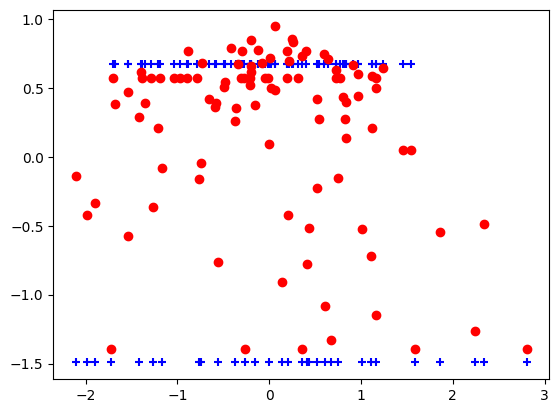

In [7]:
model = svm.SVR()
model.fit(X, y)

#결정계수를 계산한다. 
r2 = model.score(X, y)
print('R-squre 결정계수', r2)

#시각화 
plt.scatter(X[:,2], y, marker='+' , c = 'blue')
plt.scatter(X[:,2], model.predict(X), marker='o' , c = 'red')
plt.show()


In [11]:
pred_lst = list(model.predict(X) > 0) # 예측값
origin_lst = list(middle.status == 1) # 실제값

In [12]:
sum([pred_lst[i] == origin_lst[i] for i in range(0,len(pred_lst))]) / len(pred_lst) # 정확도

0.95